# STEP 1

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
df= pd.read_csv('dataframe_.csv')
df.head(5)

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [20]:
df.shape

(1697, 2)

In [21]:
df.columns

Index(['input', 'output'], dtype='object')

In [22]:
df.dtypes

input     float64
output    float64
dtype: object

In [27]:
df['output'].value_counts()

-95.000000     32
-33.000000     12
-78.000000     12
-32.000000     10
-75.000000     10
               ..
-76.128576      1
-49.585653      1
 128.812515     1
-36.972386      1
 92.537079      1
Name: output, Length: 969, dtype: int64

# STEP 2

In [33]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [41]:
df.fillna(method='ffill',inplace= True)

In [43]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1697 non-null   float64
 1   output  1697 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [44]:
df.describe()

,input,output
count,1697.000000,1697.000000
mean,1.225637,-34.042227
std,79.029039,65.778771
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.382214,-50.376850
75%,70.264109,-11.000000
max,134.605775,134.425495


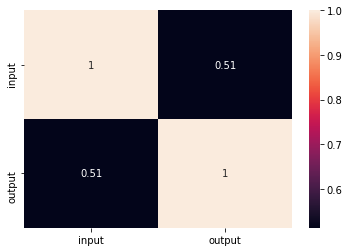

In [81]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)

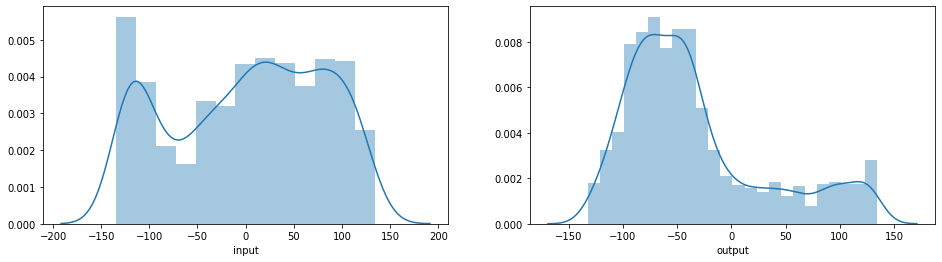

In [45]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['input'])
plt.subplot(1,2,2)
sns.distplot(df['output'])
plt.show()

# STEP 3

In [46]:
X=df.drop(['output'],axis=1)
y=df['output']

In [47]:
print('X Shape:',X.shape)
print('y Shape:',y.shape)

X Shape: (1697, 1)
y Shape: (1697,)


In [48]:
#ML Model

import warnings
warnings.filterwarnings('ignore')

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train, y_train)


LinearRegression()

In [90]:
preds1=slr.predict(X_test)
preds1

array([-21.40469273, -57.18735948, -49.70346244,  17.46580377,
         1.49625744,  14.14444374, -38.00145132, -29.54976278,
        21.28607846, -65.05243934, -27.27297439,  20.60839849,
         7.36256894, -21.49761338, -75.94522988, -36.9376383 ,
       -93.61200098, -69.35400336,   5.48085697,  13.67938715,
       -46.90732688, -88.84416414, -45.26981311, -74.22654355,
        -0.25252422, -21.40541008, -91.05895514, -47.66013405,
         4.62001598,  -4.89731221, -84.83381679,  -6.45871729,
       -45.43426058, -84.81841358,  -7.78281361,  -7.06545708,
        -6.00613913, -47.84442702,  10.04560109, -10.52847671,
       -18.41502293, -89.73008054,  -8.54348092, -89.28712234,
       -35.24647305, -20.94207547,  -8.43259063, -89.28941704,
       -30.37654865, -76.4158507 , -77.77020915, -23.59027855,
       -92.57531636,  16.13692917,  15.26277176, -27.97788631,
       -10.20201113, -32.83315037, -13.82216496, -88.26546224,
       -10.55347514, -11.77424622, -11.76943741,   3.25

In [75]:
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 0.443
Intercept: -34.641


In [86]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue', edgecolor='black', alpha=0.4)
    plt.plot(X, model.predict(X), color='red')
    return None

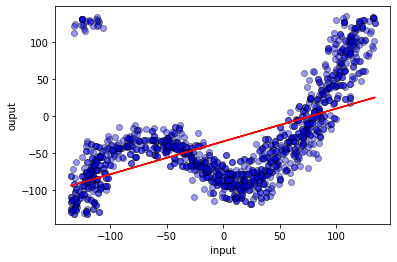

In [92]:
lin_regplot(X_train, y_train, slr)
plt.xlabel('input')
plt.ylabel('ouput')

plt.show()

In [61]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),max_trials=20,min_samples=50,residual_threshold=5.0,random_state=0)
ransac.fit(X_train,y_train)

RANSACRegressor(base_estimator=LinearRegression(), max_trials=20,
                min_samples=50, random_state=0, residual_threshold=5.0)

In [73]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

In [80]:
preds = ransac.predict(X_test)
preds

array([-35.77241847, -49.14280416, -46.34640582, -21.2482486 ,
       -27.21535539, -22.48929262, -41.97388649, -38.81586765,
       -19.82078243, -52.08163351, -37.96513344, -20.07400119,
       -25.02337657, -35.80713877, -56.15178322, -41.57638704,
       -62.75306717, -53.68893602, -25.72648836, -22.66306351,
       -45.30161474, -60.97153931, -44.68974893, -55.50958684,
       -27.86879705, -35.77268651, -61.79910787, -45.58290519,
       -26.04814623, -29.60434704, -59.47305148, -30.18777444,
       -44.7511956 , -59.46729599, -30.68253014, -30.41448602,
       -30.01866617, -45.65176725, -24.0208472 , -31.70846191,
       -34.65531228, -61.30256674, -30.96675757, -61.13705303,
       -40.94447405, -35.59955904, -30.92532282, -61.13791045,
       -39.12480064, -56.32763322, -56.83369653, -36.58907435,
       -62.36570439, -21.74478973, -22.07142334, -38.22852757,
       -31.58647629, -40.04272307, -32.93916622, -60.75530424,
       -31.71780271, -32.17395038, -32.17215354, -26.55

# STEP 4

In [82]:
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [83]:
outlier_detector = IsolationForest(contamination=0.05, random_state=42)
outliers = outlier_detector.fit_predict(df)
df = df[outliers == 1]

In [85]:
def feature_engineer(df):
    df["new_feature"] = df["input"] + df["output"]
    return df

df = feature_engineer(df)

# STEP 5

In [93]:
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
mse = mean_squared_error(X_test, preds)
r2 = r2_score(X_test, preds)

In [95]:
model_scores = {"Final Model": (mse, r2)}

In [96]:
model_scores

{'Final Model': (6120.8632695271945, -0.01055955957322463)}

# STEP 6

In [102]:
from sklearn.linear_model import LinearRegression

# Feature engineering
df = feature_engineer(df)

# Separate the predictors (X) and targets (y)
X = df.drop("output", axis=1)
y = df["output"]

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

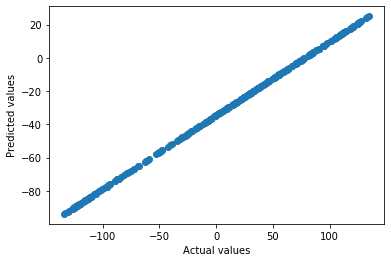

In [105]:
plt.scatter(X_test["input"],preds1)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()